In [1]:
import numpy as np
import xarray as xr
from xcube.core.resampling import rectify_dataset

In [2]:
def imshow(var):
    h, w = var.shape
    sx = 14
    sy = sx * h / w
    var.plot.imshow(figsize=(sx, sy), vmax=0.20, cmap="gray")

In [3]:
%%time
source_ds = xr.open_zarr("../inputdata/S3-OLCI-L2A.zarr.zip")
source_ds

CPU times: total: 234 ms
Wall time: 253 ms


<timed exec>:1: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.


<xarray.Dataset> Size: 72MB
Dimensions:        (y: 1890, x: 1189)
Coordinates:
    lat            (y, x) float64 18MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    lon            (y, x) float64 18MB dask.array<chunksize=(512, 512), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    quality_flags  (y, x) uint32 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_3         (y, x) float32 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_6         (y, x) float32 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    rtoa_8         (y, x) float32 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

CPU times: total: 703 ms
Wall time: 686 ms


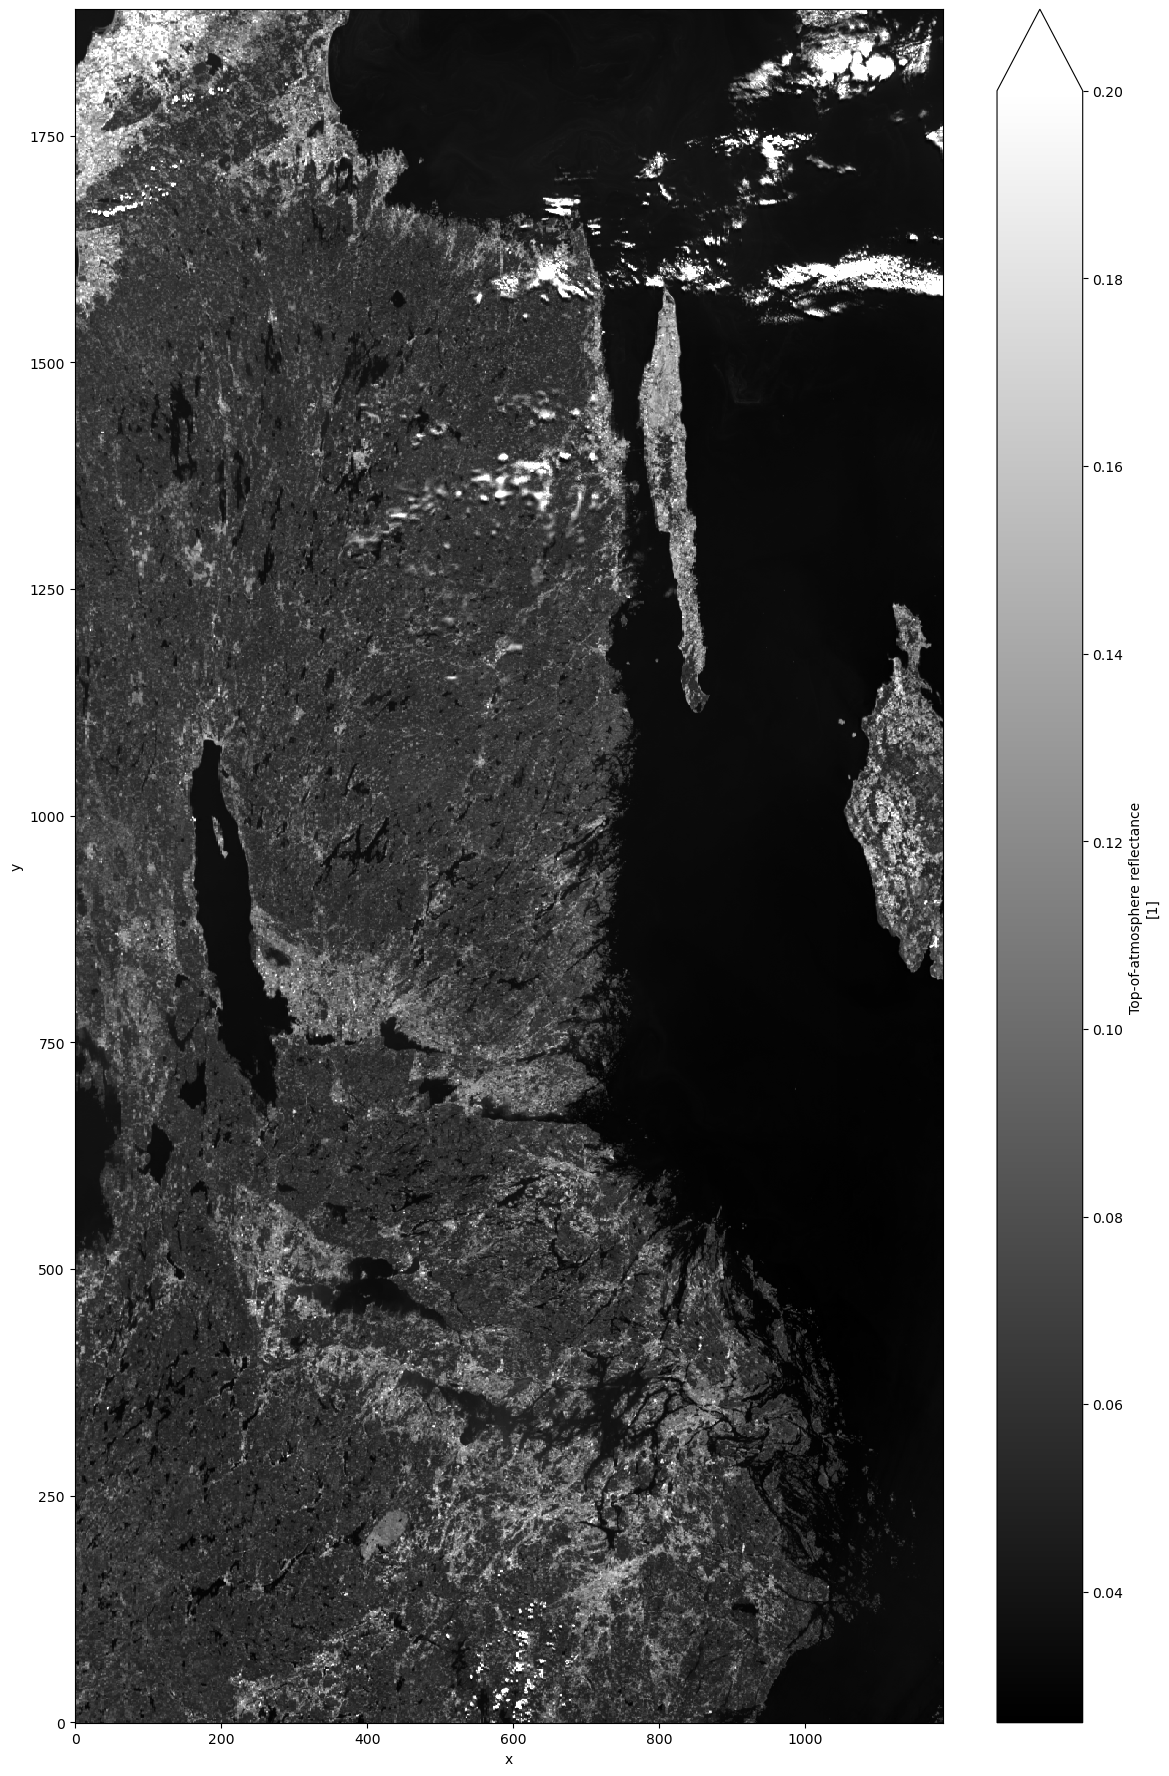

In [4]:
%%time
imshow(source_ds.rtoa_8)

In [5]:
%%time
target_ds = rectify_dataset(source_ds, var_names="rtoa_8", tile_size=2048)
target_ds

CPU times: total: 3 s
Wall time: 1.95 s


<xarray.Dataset> Size: 26MB
Dimensions:   (lat: 2177, lon: 2926, bnds: 2)
Coordinates:
  * lat       (lat) float64 17kB 60.64 60.64 60.64 60.63 ... 55.21 55.2 55.2
  * lon       (lon) float64 23kB 12.69 12.7 12.7 12.7 ... 20.0 20.0 20.0 20.01
    lon_bnds  (lon, bnds) float64 47kB 12.69 12.7 12.7 ... 20.01 20.01 20.01
    lat_bnds  (lat, bnds) float64 35kB 60.64 60.64 60.64 ... 55.2 55.2 55.2
Dimensions without coordinates: bnds
Data variables:
    rtoa_8    (lat, lon) float32 25MB dask.array<chunksize=(2048, 2048), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

CPU times: total: 2.38 s
Wall time: 1.72 s


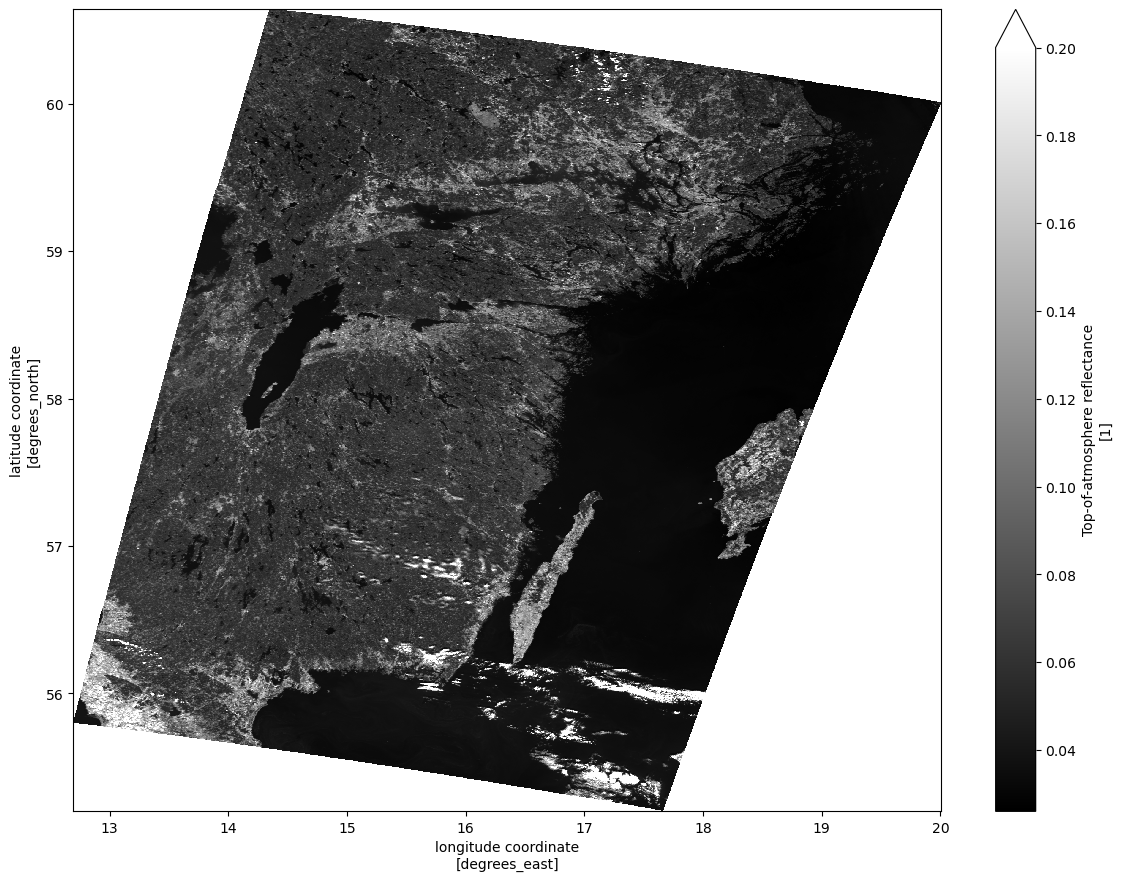

In [6]:
%%time
imshow(target_ds.rtoa_8)

In [7]:
%%time
target_ds = rectify_dataset(source_ds, var_names="rtoa_8", tile_size=None)
target_ds

CPU times: total: 5.97 s
Wall time: 2.3 s


<xarray.Dataset> Size: 26MB
Dimensions:   (lat: 2177, lon: 2926, bnds: 2)
Coordinates:
  * lat       (lat) float64 17kB 60.64 60.64 60.64 60.63 ... 55.21 55.2 55.2
  * lon       (lon) float64 23kB 12.69 12.7 12.7 12.7 ... 20.0 20.0 20.0 20.01
    lon_bnds  (lon, bnds) float64 47kB 12.69 12.7 12.7 ... 20.01 20.01 20.01
    lat_bnds  (lat, bnds) float64 35kB 60.64 60.64 60.64 ... 55.2 55.2 55.2
Dimensions without coordinates: bnds
Data variables:
    rtoa_8    (lat, lon) float32 25MB nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

CPU times: total: 109 ms
Wall time: 117 ms


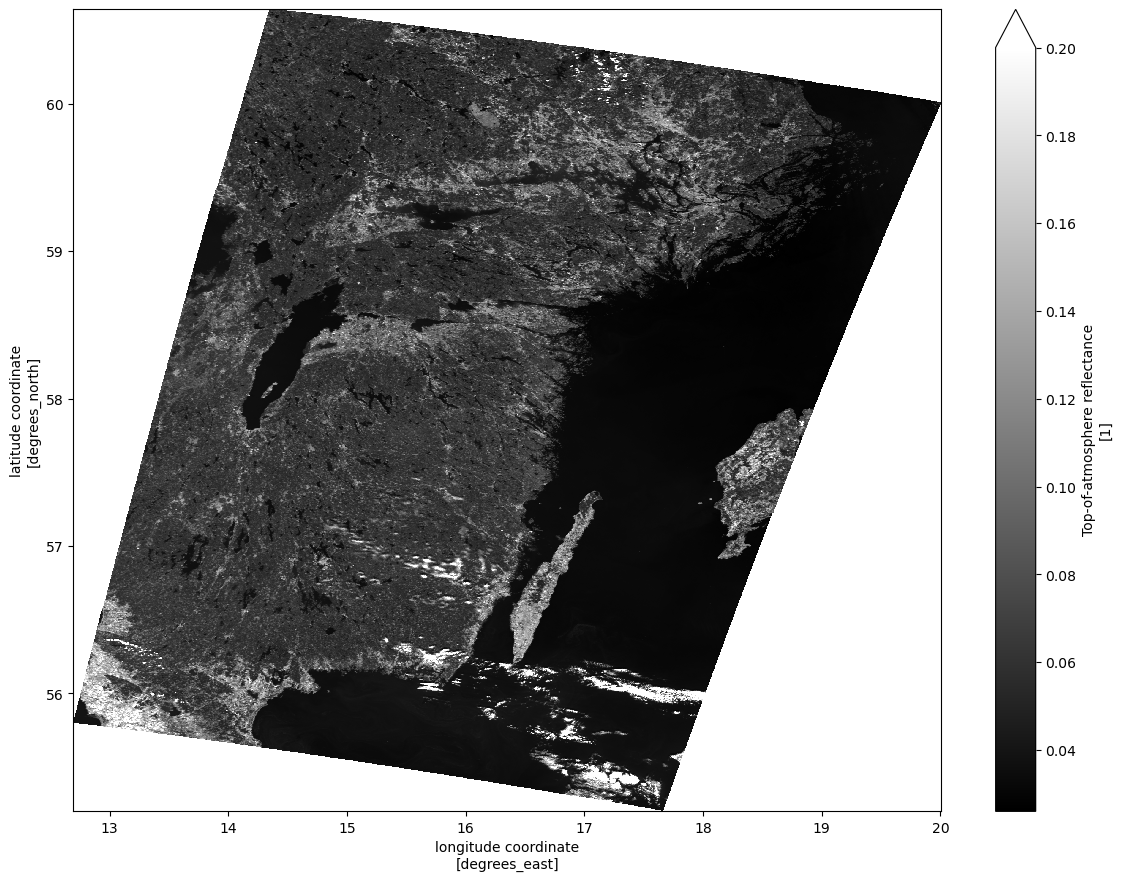

In [8]:
%%time
imshow(target_ds.rtoa_8)

CPU times: total: 172 ms
Wall time: 145 ms


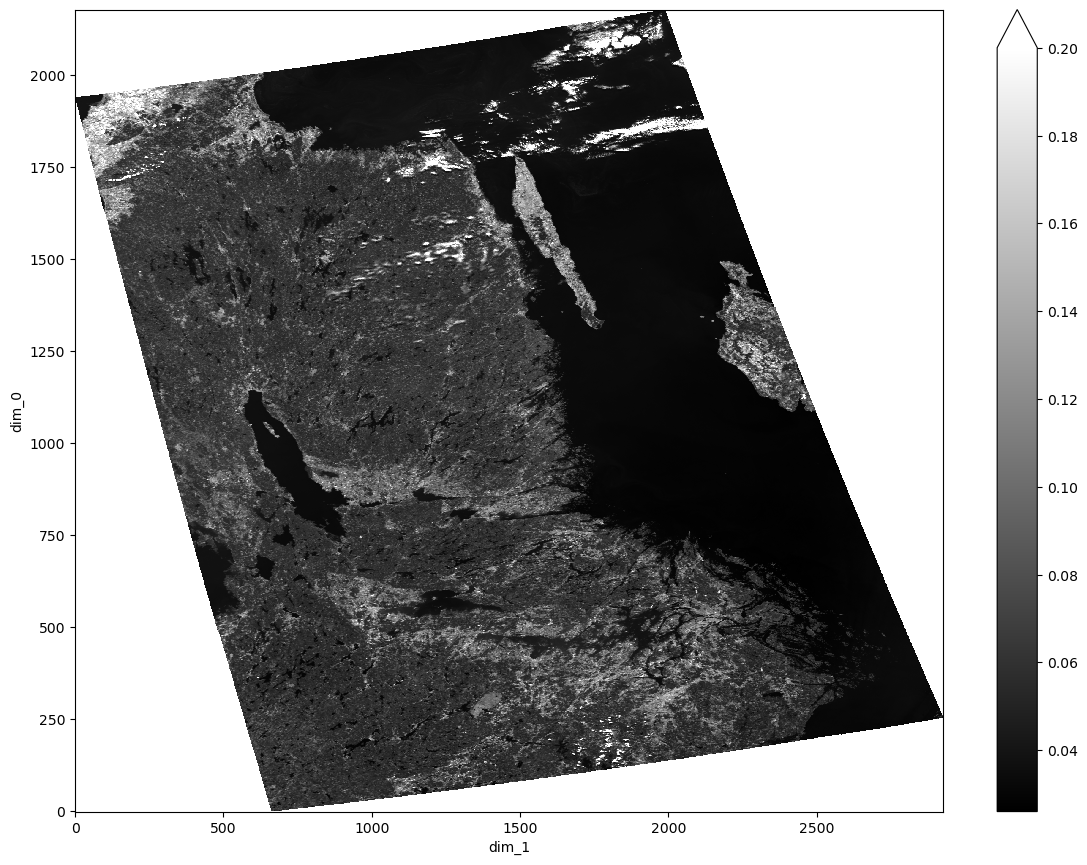

In [9]:
%%time
imshow(xr.DataArray(target_ds.rtoa_8.values))

In [10]:
%%time
target_ds = rectify_dataset(
    source_ds, 
    var_names="rtoa_8",
    tile_size=None, 
    is_j_axis_up=True,
    output_ij_names=("source_i", "source_j"),
)
target_ds

CPU times: total: 5.86 s
Wall time: 2.18 s


<xarray.Dataset> Size: 128MB
Dimensions:   (lat: 2177, lon: 2926, bnds: 2)
Coordinates:
  * lat       (lat) float64 17kB 55.2 55.2 55.21 55.21 ... 60.64 60.64 60.64
  * lon       (lon) float64 23kB 12.69 12.7 12.7 12.7 ... 20.0 20.0 20.0 20.01
    lon_bnds  (lon, bnds) float64 47kB 12.69 12.7 12.7 ... 20.01 20.01 20.01
    lat_bnds  (lat, bnds) float64 35kB 55.2 55.2 55.2 55.2 ... 60.64 60.64 60.64
Dimensions without coordinates: bnds
Data variables:
    rtoa_8    (lat, lon) float32 25MB nan nan nan nan nan ... nan nan nan nan
    source_i  (lat, lon) float64 51MB nan nan nan nan nan ... nan nan nan nan
    source_j  (lat, lon) float64 51MB nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

CPU times: total: 109 ms
Wall time: 106 ms


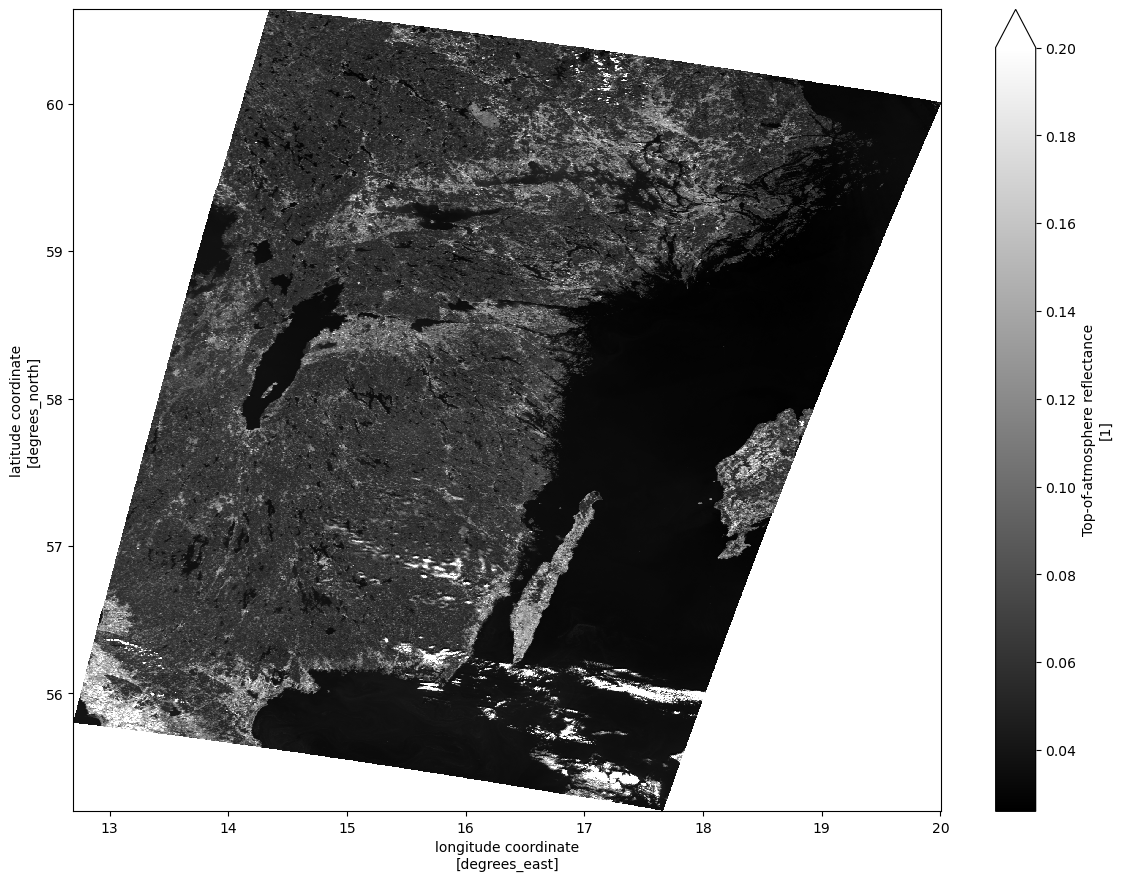

In [11]:
%%time
imshow(target_ds.rtoa_8)

In [12]:
target_ds_subset = target_ds.sel(lon=slice(15.4, 15.5), lat=slice(58.5, 58.6))
target_ds_subset

<xarray.Dataset> Size: 34kB
Dimensions:   (lat: 40, lon: 40, bnds: 2)
Coordinates:
  * lat       (lat) float64 320B 58.5 58.5 58.51 58.51 ... 58.59 58.59 58.6 58.6
  * lon       (lon) float64 320B 15.4 15.4 15.41 15.41 ... 15.49 15.49 15.5 15.5
    lon_bnds  (lon, bnds) float64 640B 15.4 15.4 15.4 15.41 ... 15.5 15.5 15.5
    lat_bnds  (lat, bnds) float64 640B 58.5 58.5 58.5 58.5 ... 58.6 58.6 58.6
Dimensions without coordinates: bnds
Data variables:
    rtoa_8    (lat, lon) float32 6kB 0.09842 0.1032 0.1032 ... 0.05366 0.05761
    source_i  (lat, lon) float64 13kB 386.2 386.6 387.0 ... 398.3 398.7 399.0
    source_j  (lat, lon) float64 13kB 765.9 765.8 765.7 ... 725.6 725.5 725.4
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

In [13]:
bbox_ij = tuple(map(int, [target_ds_subset.source_i.min(),
                          target_ds_subset.source_j.min(),
                          target_ds_subset.source_i.max(), 
                          target_ds_subset.source_j.max()]))
bbox_ij

(378, 725, 406, 765)

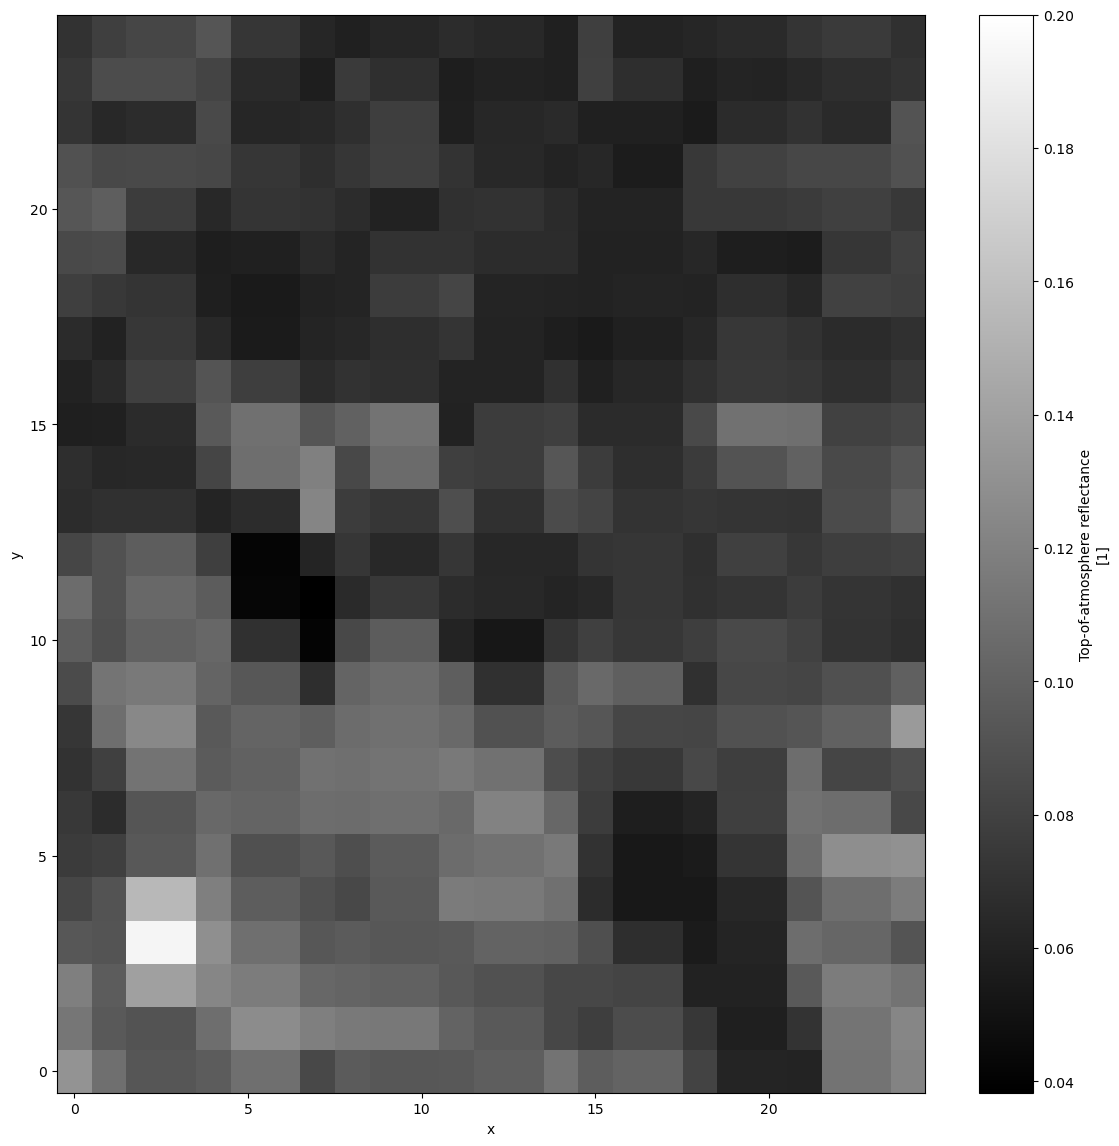

In [14]:
imshow(source_ds.rtoa_8.isel(x=slice(385, 385 + 25), y=slice(740, 740 + 25))[::-1,:])

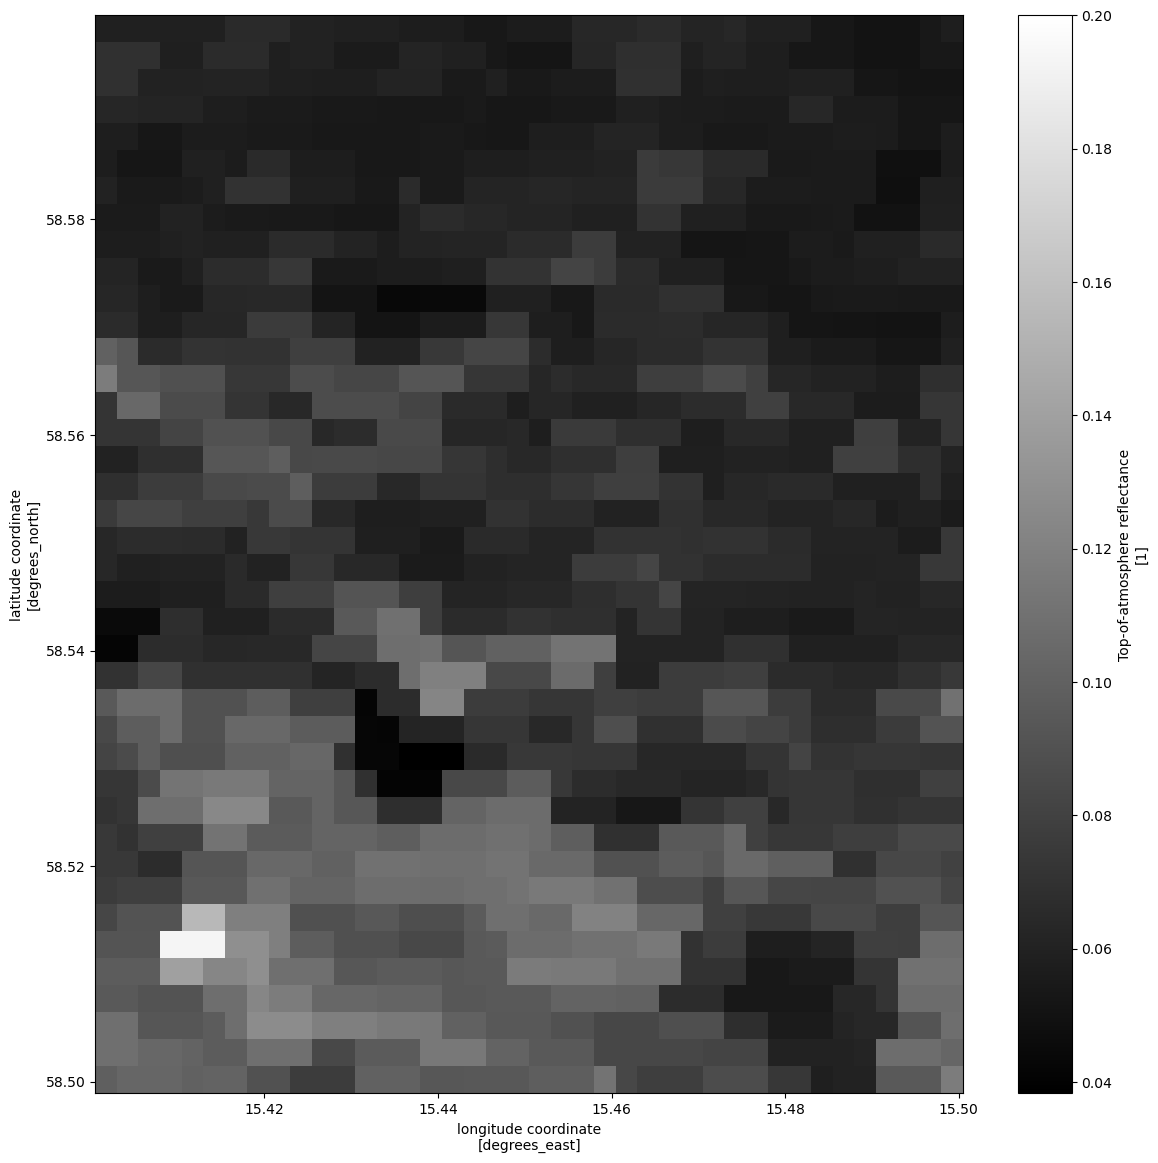

In [15]:
imshow(target_ds_subset.rtoa_8)

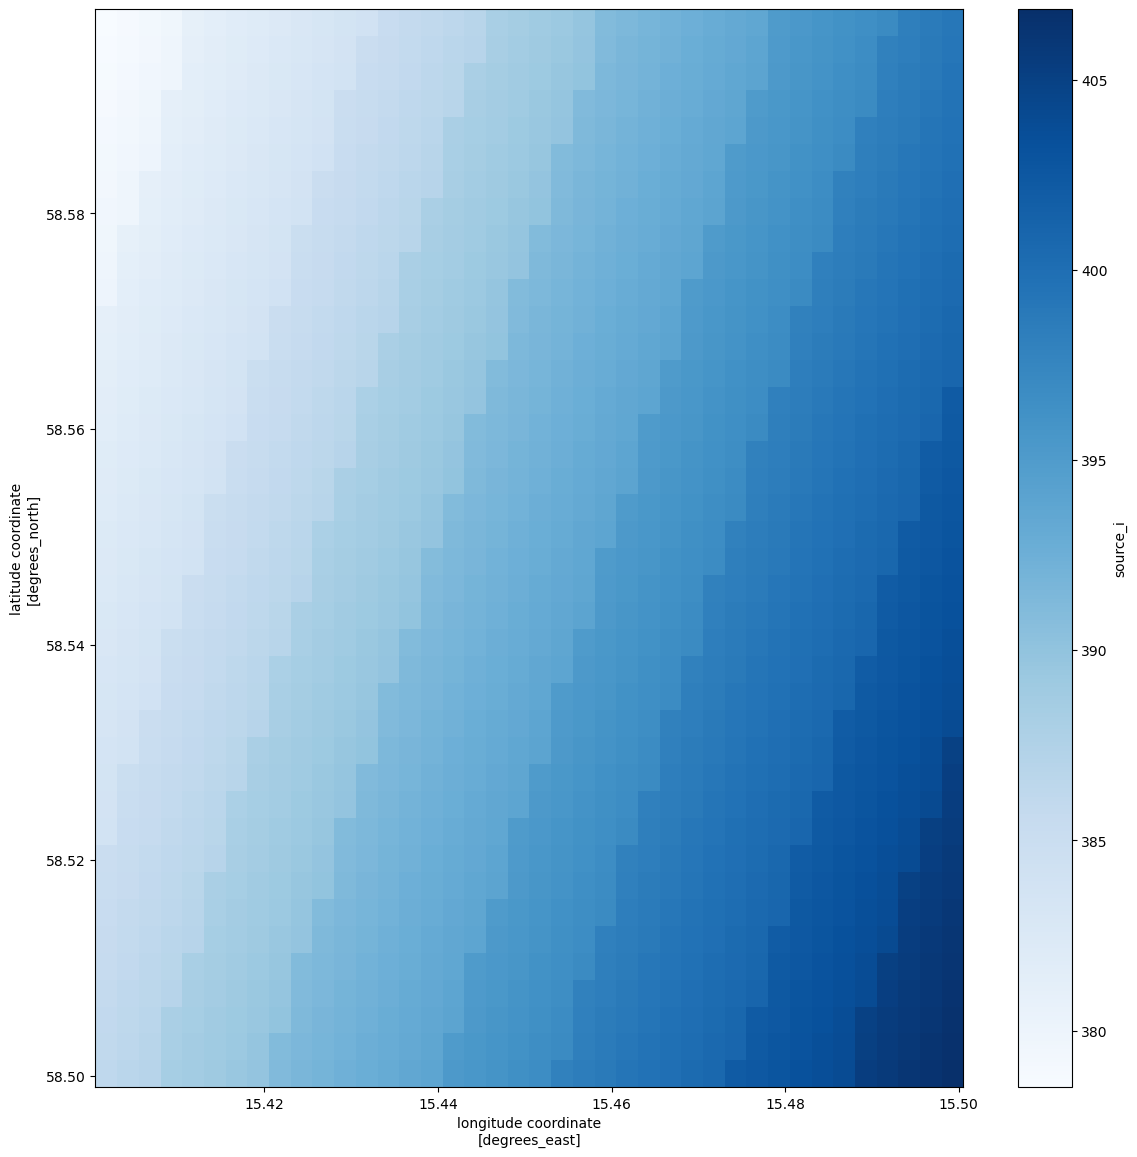

In [16]:
target_ds_subset.source_i.plot(figsize=(14,14), cmap="Blues")

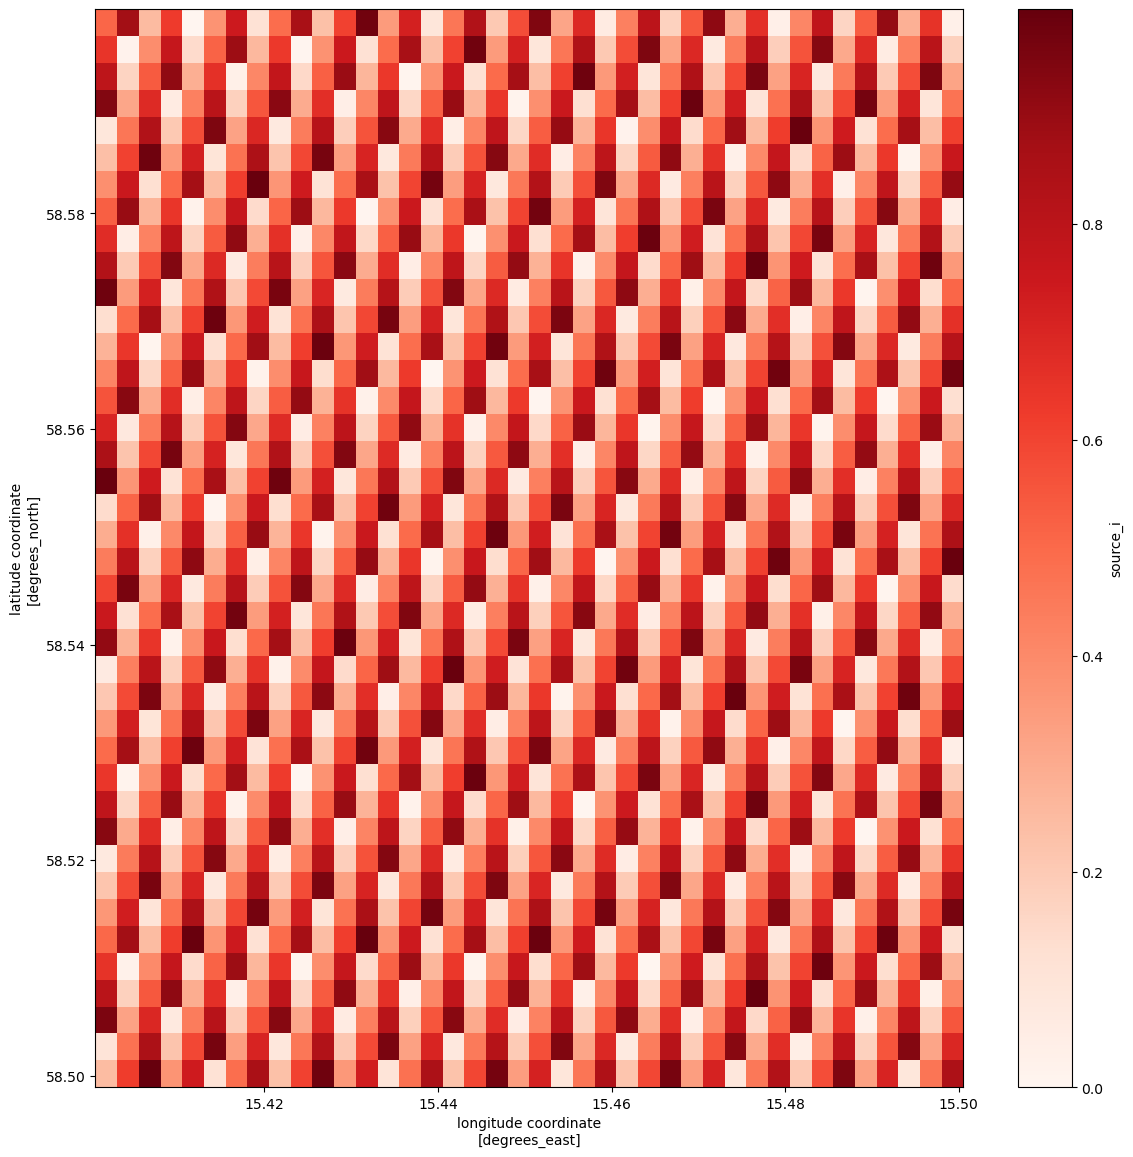

In [17]:
(target_ds_subset.source_i - np.floor(target_ds_subset.source_i)).plot(figsize=(14,14),  cmap="Reds")

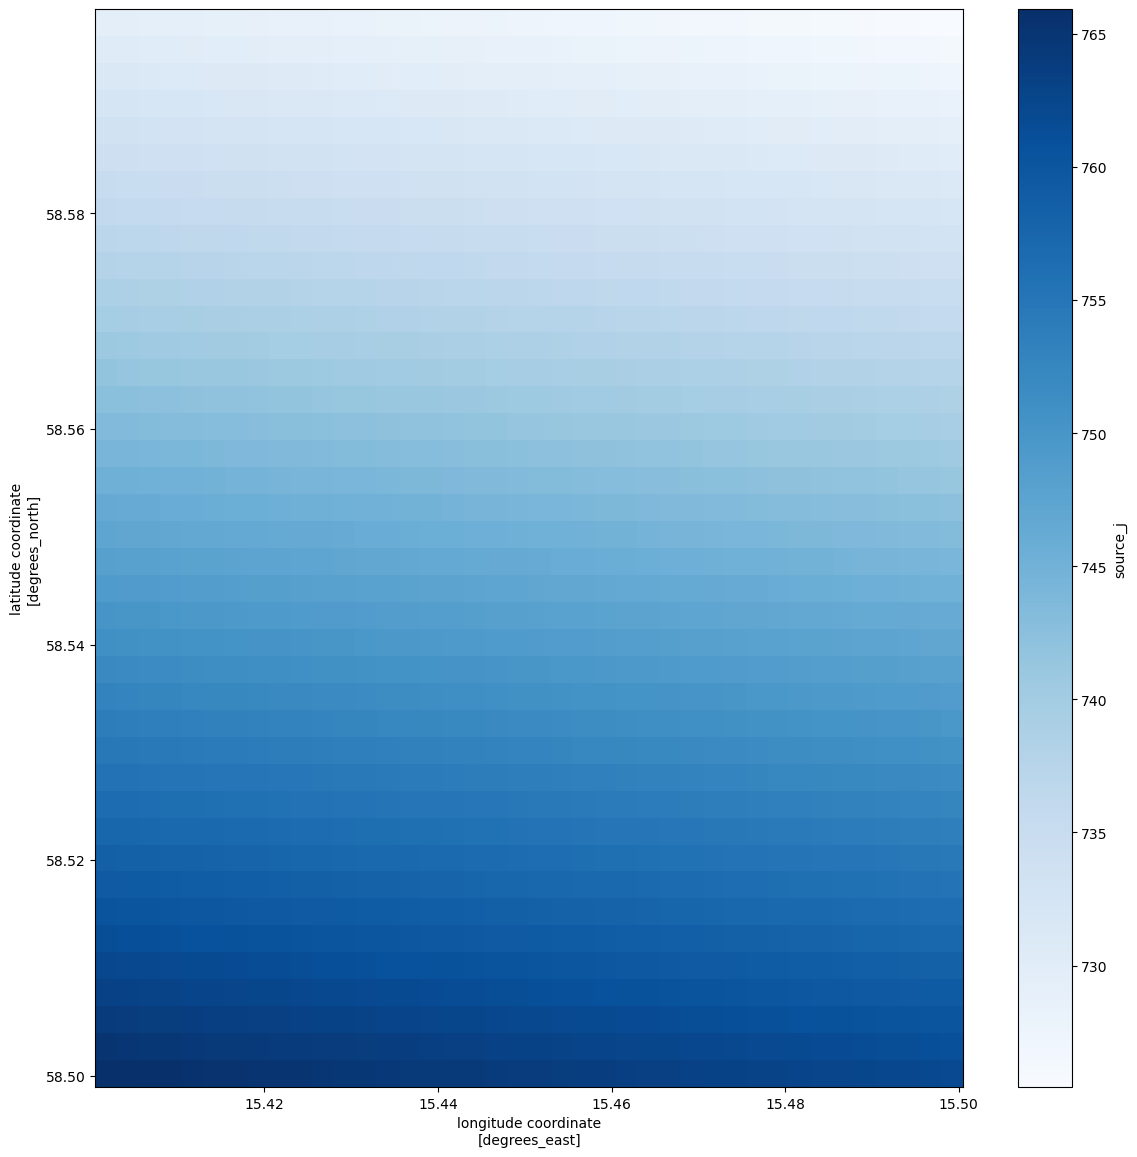

In [18]:
target_ds_subset.source_j.plot.imshow(figsize=(14,14), cmap="Blues")

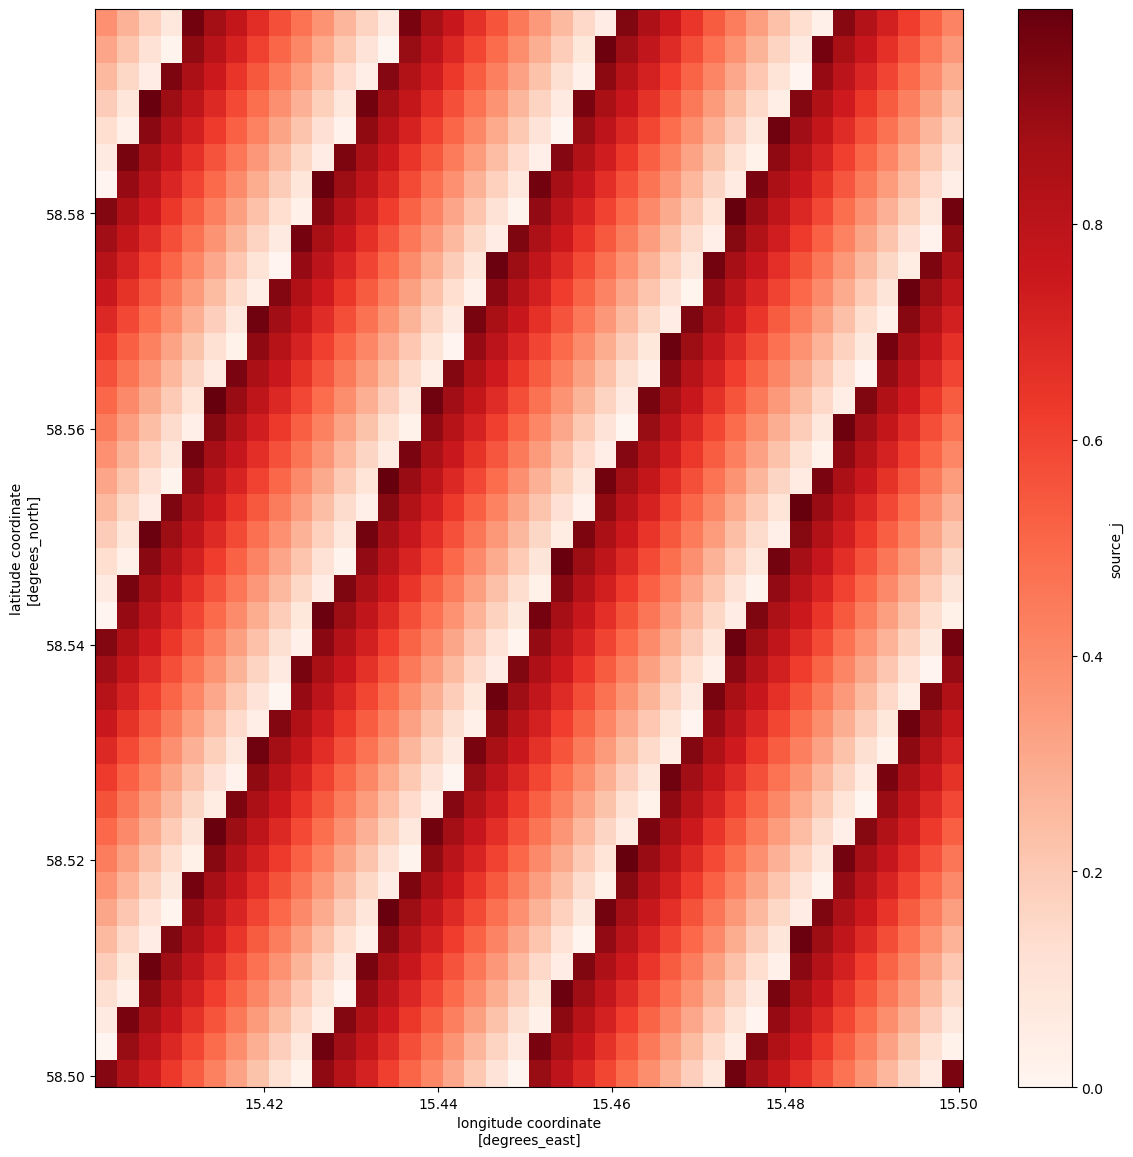

In [19]:
(target_ds_subset.source_j - np.floor(target_ds_subset.source_j)).plot(figsize=(14,14),  cmap="Reds")

In [20]:
%%time
target_ds_interp = rectify_dataset(
    source_ds, 
    var_names="rtoa_8", 
    tile_size=None,
    is_j_axis_up=True, 
    interpolation="bilinear",
)
target_ds_interp

CPU times: total: 5.73 s
Wall time: 2.22 s


<xarray.Dataset> Size: 26MB
Dimensions:   (lat: 2177, lon: 2926, bnds: 2)
Coordinates:
  * lat       (lat) float64 17kB 55.2 55.2 55.21 55.21 ... 60.64 60.64 60.64
  * lon       (lon) float64 23kB 12.69 12.7 12.7 12.7 ... 20.0 20.0 20.0 20.01
    lon_bnds  (lon, bnds) float64 47kB 12.69 12.7 12.7 ... 20.01 20.01 20.01
    lat_bnds  (lat, bnds) float64 35kB 55.2 55.2 55.2 55.2 ... 60.64 60.64 60.64
Dimensions without coordinates: bnds
Data variables:
    rtoa_8    (lat, lon) float32 25MB nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

CPU times: total: 109 ms
Wall time: 124 ms


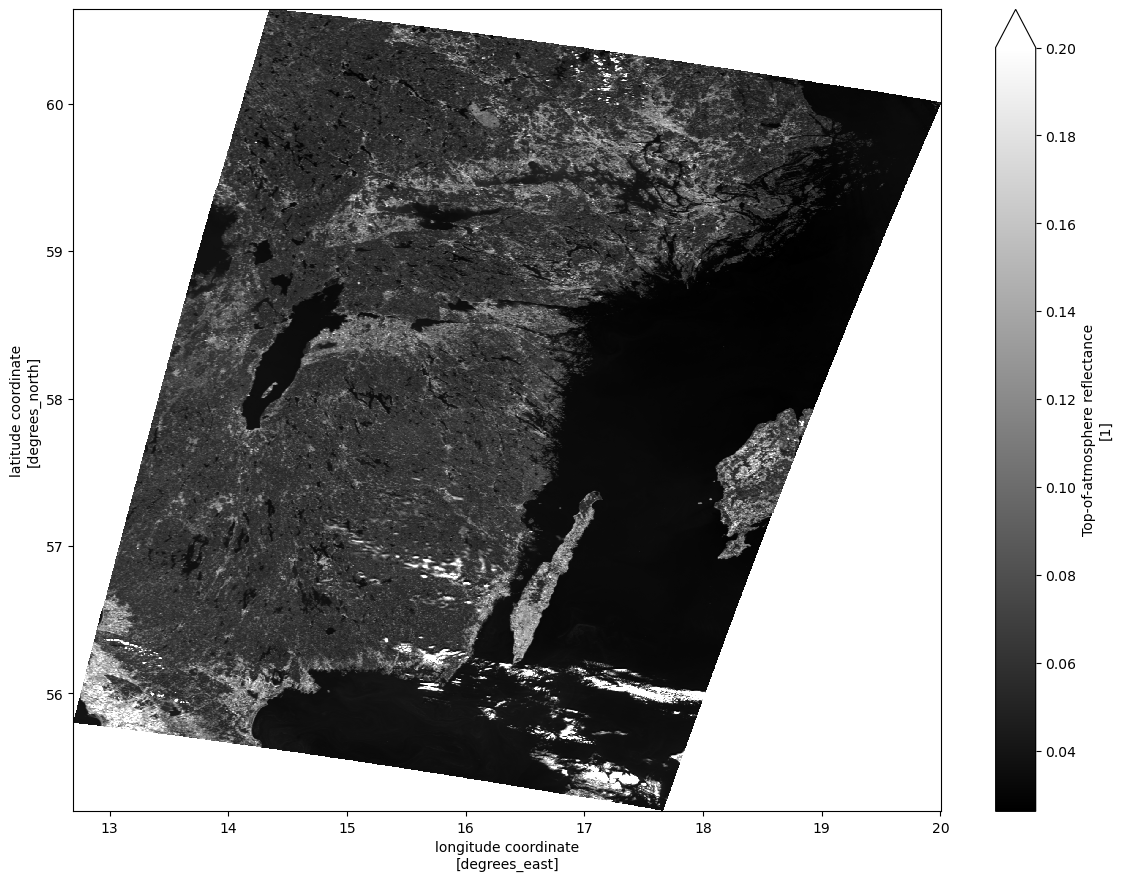

In [21]:
%%time
imshow(target_ds_interp.rtoa_8)

In [22]:
rtoa_8_diff = target_ds_interp.rtoa_8 - target_ds.rtoa_8

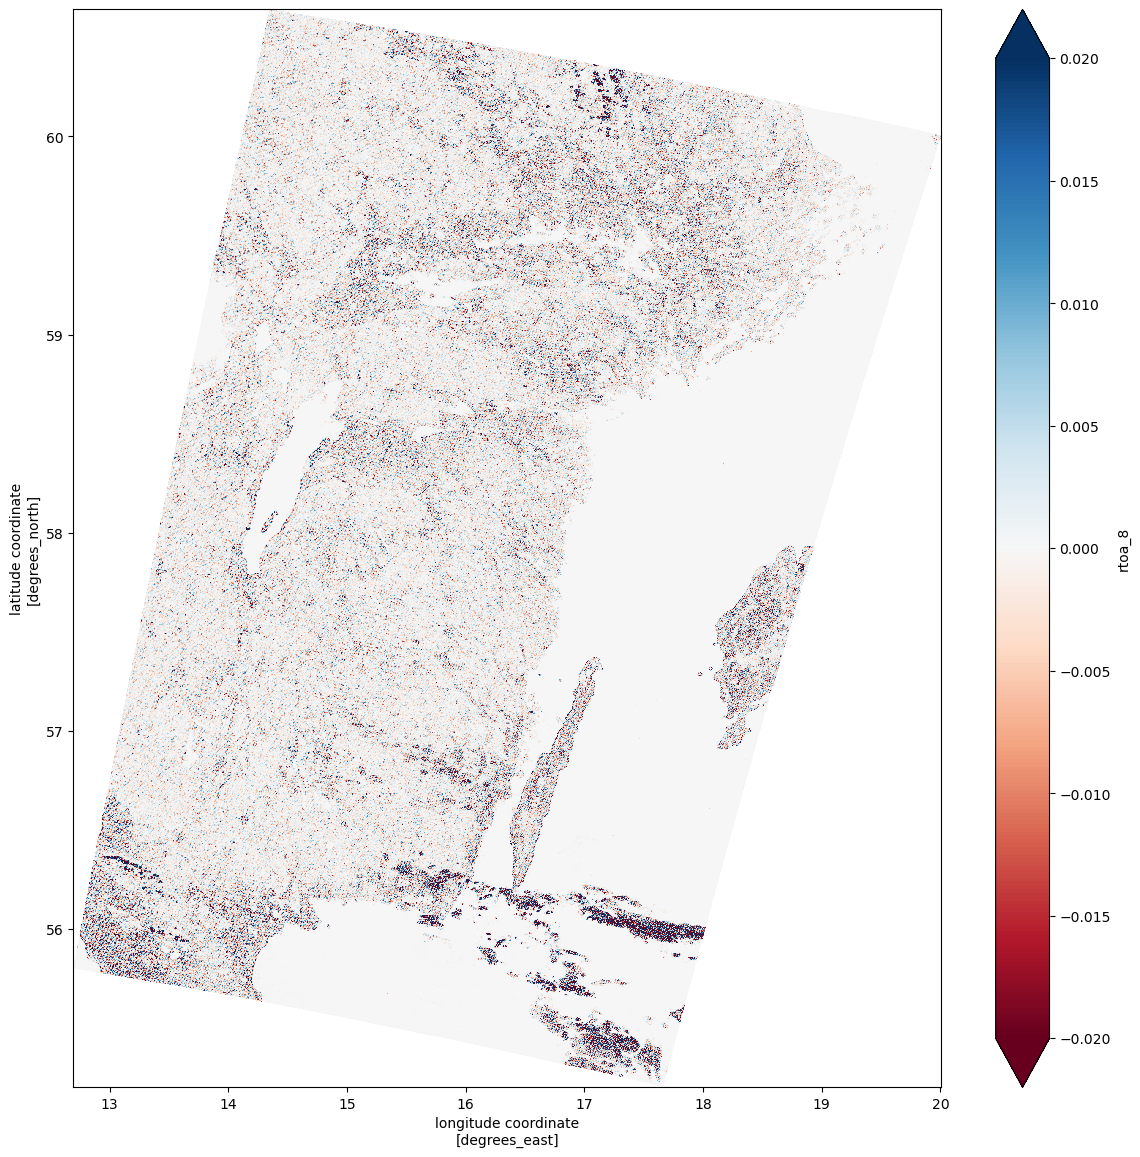

In [23]:
rtoa_8_diff.plot.imshow(figsize=(14, 14), vmin=-0.02, vmax=+0.02, cmap="RdBu")

In [24]:
target_ds_interp_subset = target_ds_interp.sel(lon=slice(15.4, 15.5), lat=slice(58.5, 58.6))
target_ds_interp_subset

<xarray.Dataset> Size: 8kB
Dimensions:   (lat: 40, lon: 40, bnds: 2)
Coordinates:
  * lat       (lat) float64 320B 58.5 58.5 58.51 58.51 ... 58.59 58.59 58.6 58.6
  * lon       (lon) float64 320B 15.4 15.4 15.41 15.41 ... 15.49 15.49 15.5 15.5
    lon_bnds  (lon, bnds) float64 640B 15.4 15.4 15.4 15.41 ... 15.5 15.5 15.5
    lat_bnds  (lat, bnds) float64 640B 58.5 58.5 58.5 58.5 ... 58.6 58.6 58.6
Dimensions without coordinates: bnds
Data variables:
    rtoa_8    (lat, lon) float32 6kB 0.1001 0.1021 0.1033 ... 0.05424 0.05595
Attributes:
    Conventions:   CF-1.4
    product_type:  C2RCC_OLCI
    start_date:    04-JUL-2018 09:21:55.677316
    stop_date:     04-JUL-2018 09:23:18.811790

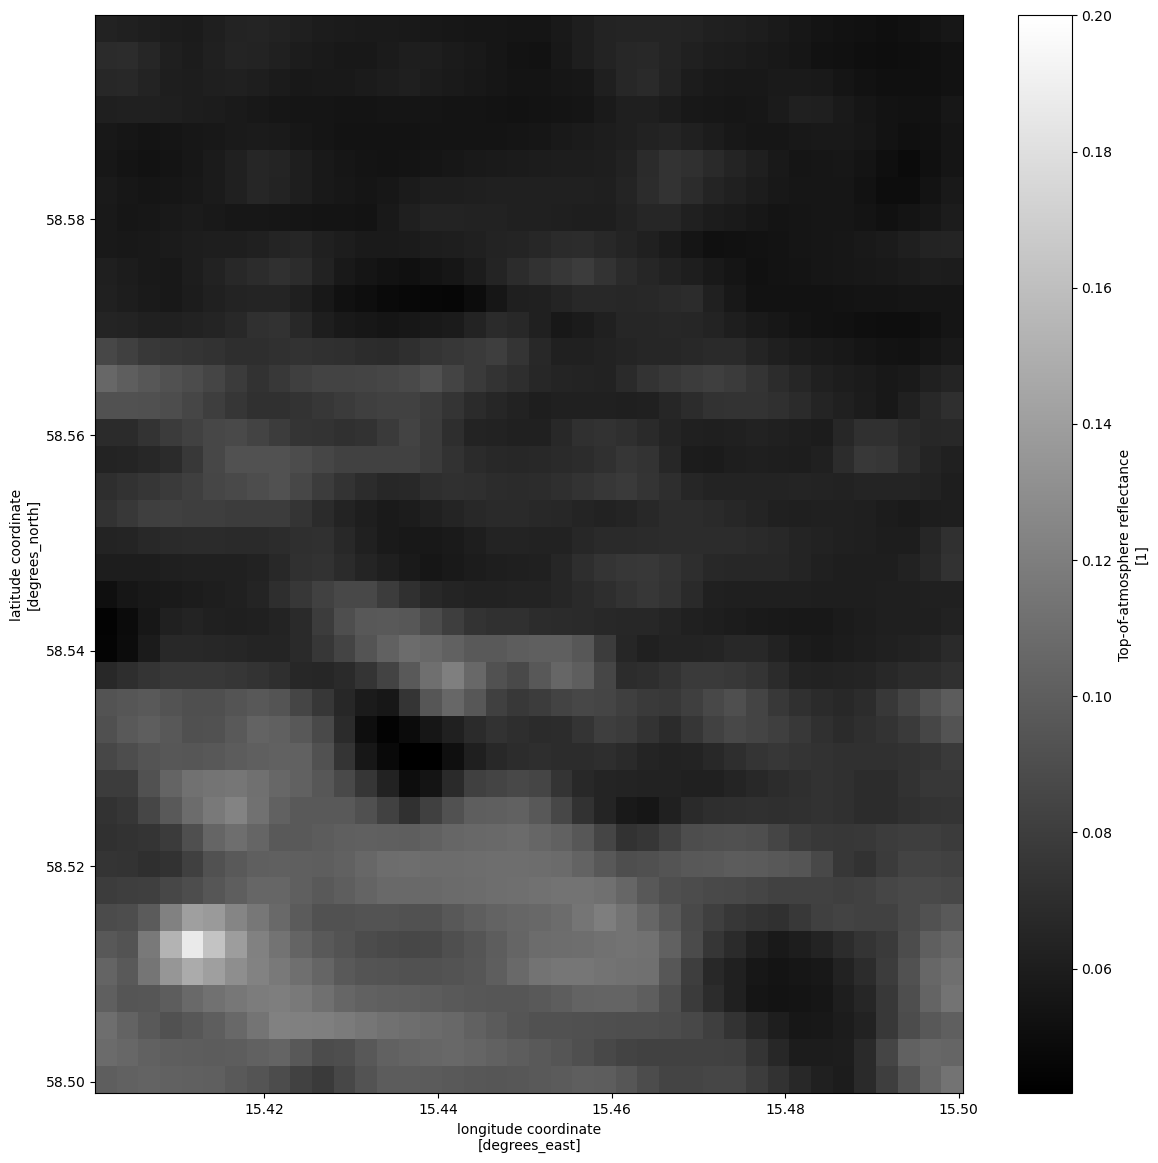

In [25]:
imshow(target_ds_interp_subset.rtoa_8)

In [26]:
diff = target_ds_interp_subset.rtoa_8 - target_ds_subset.rtoa_8

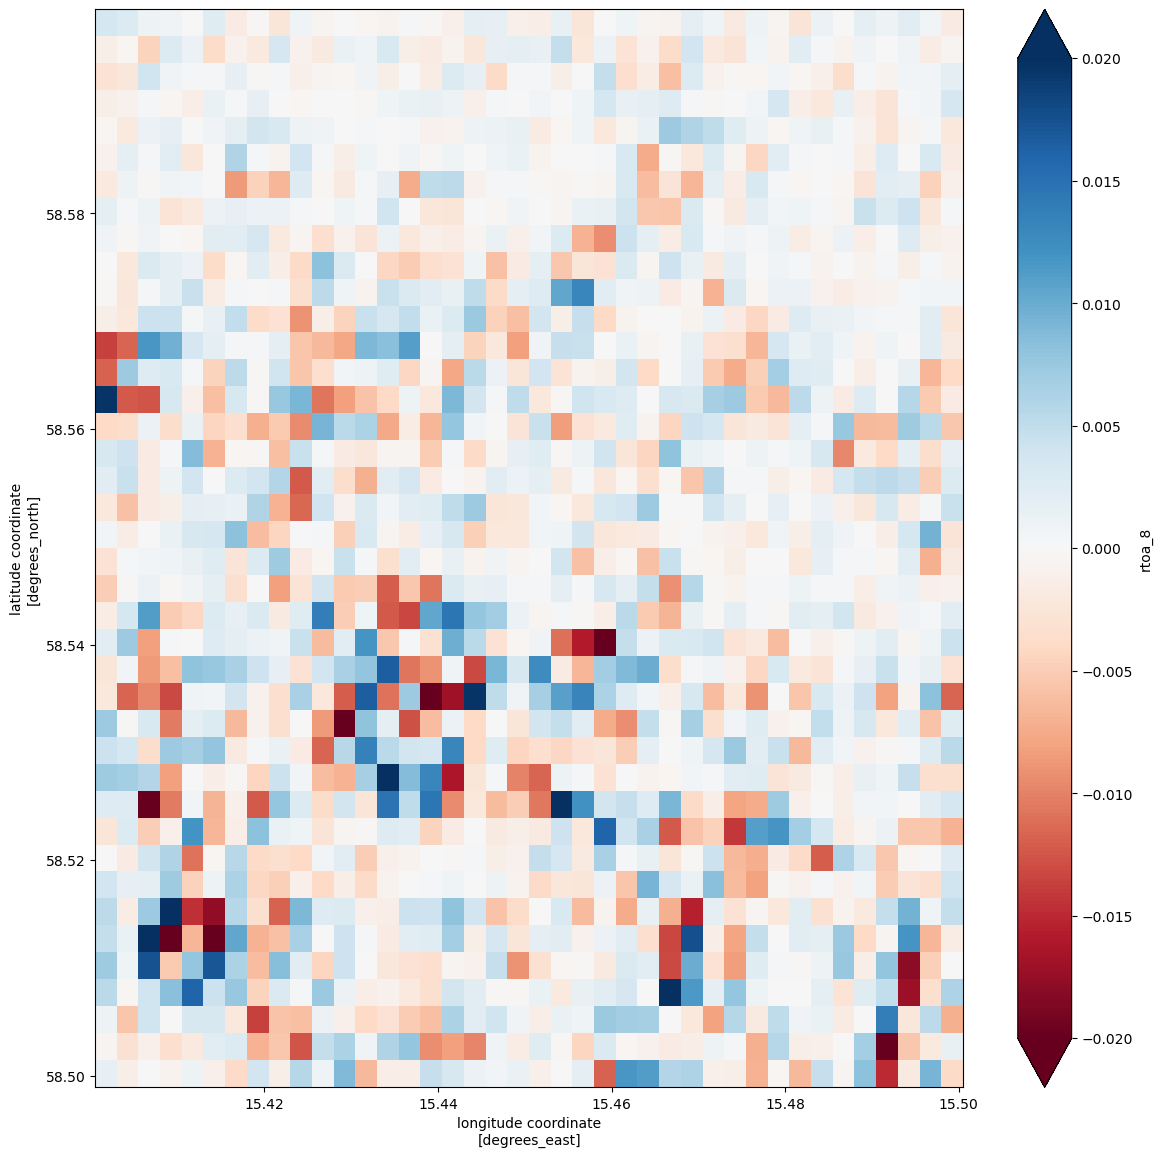

In [27]:
diff.plot.imshow(figsize=(14, 14), vmin=-0.02, vmax=+0.02, cmap="RdBu")